# Logistic Regresion

In [52]:
import numpy as np

In [53]:
class LR(object):
    def __init__(self, eta=0.05, n_iter  = 10, random_state =1 ):
        self.eta = eta
        self.n_iter = n_iter 
        self.random_state = random_state
        
        
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w = rgen.normal(loc =0.0, scale =0.01, size =1 + X.shape[1])
        self.cost = []
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w[1:] += self.eta * X.T.dot(errors)
            self.w[0] += self.eta * errors.sum()

            cost = ( -y.dot(np.log(output)) - ((1-y).dot(np.log( 1- output))))
            self.cost =  cost
            
            return self
        
    def net_input(self,X):
        return np.dot(X, self.w[1:]) + self.w[0]
        
        
    def activation(self,z):
            
        return 1. / (1+ np.exp(-np.clip(z, -250,250)))
        
        
    def predict(self,X):
        return np.where(self.net_input(X) >= 0.0, 1,0)
        

In [54]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:, [2,3]]
y = iris.target


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.3, random_state =1, stratify = y)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

In [55]:
lr = LR(eta=0.05, n_iter =100, random_state=1)


In [56]:
lr.fit(X_train_std, y_train)

In [57]:
lr.w

array([2.6199251 , 4.08834811, 4.09979893])

# From Scikit Learn

In [58]:
from sklearn.linear_model import LogisticRegression


lr = LogisticRegression(C=100.0, random_state=1)



In [59]:
lr.fit(X_train_std, y_train)

LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
lr.coef_

array([[-6.93265988, -5.76495748],
       [-2.03192177, -0.03413691],
       [ 8.96458165,  5.79909439]])

In [61]:
lr.predict_proba(X_test_std[:3, :])

array([[1.52213484e-12, 3.85303417e-04, 9.99614697e-01],
       [9.93560717e-01, 6.43928295e-03, 1.14112016e-15],
       [9.98655228e-01, 1.34477208e-03, 1.76178271e-17]])

In [62]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis =1)

array([2, 0, 0])

In [63]:
from plot_utils import plot_decision_regions

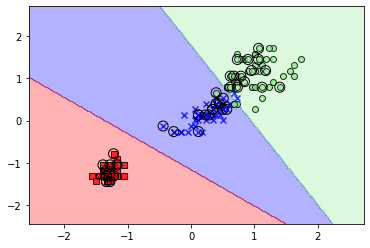

In [64]:
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))